In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df["Churn"].value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

lets drop customer_id since its not useful

In [9]:
df.drop("customerID",axis=1,inplace=True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


lets convert binary variables into numeric

In [11]:
df["gender"]=df["gender"].replace({"Male":1,"Female":0})

In [12]:
df["Partner"]=df["Partner"].replace({"Yes":1,"No":0})

In [15]:
df["Dependents"]=df["Dependents"].replace({"Yes":1,"No":0})

In [16]:
df["PhoneService"]=df["PhoneService"].replace({"Yes":1,"No":0})

In [17]:
df["MultipleLines"].unique()


array(['No phone service', 'No', 'Yes'], dtype=object)

In [18]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [19]:
df["MultipleLines"]=df["MultipleLines"].replace({"Yes":1,"No":0,"No phone service":0})

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [22]:
df_with_dummies = pd.get_dummies(df, prefix='InternetService_', columns=['InternetService'])

In [23]:
df_with_dummies["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [24]:
df_with_dummies["OnlineSecurity"]=df_with_dummies["OnlineSecurity"].replace({"Yes":1,"No":0,"No internet service":0})

In [25]:
df_with_dummies["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [26]:
df_with_dummies["OnlineBackup"]=df_with_dummies["OnlineBackup"].replace({"Yes":1,"No":0,"No internet service":0})

In [27]:
df_with_dummies["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [28]:
df_with_dummies["DeviceProtection"]=df_with_dummies["DeviceProtection"].replace({"Yes":1,"No":0,"No internet service":0})

In [29]:
df_with_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService__DSL,InternetService__Fiber optic,InternetService__No
0,0,0,1,0,1,0,0,0,1,0,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,No,One year,No,Mailed check,56.95,1889.5,No,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [30]:
print(df_with_dummies["TechSupport"].value_counts())
df_with_dummies["TechSupport"]=df_with_dummies["TechSupport"].replace({"Yes":1,"No":0,"No internet service":0})

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [32]:
print(df_with_dummies["StreamingTV"].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


In [33]:
df_with_dummies["StreamingTV"]=df_with_dummies["StreamingTV"].replace({"Yes":1,"No":0,"No internet service":0})

In [34]:
print(df_with_dummies["StreamingMovies"].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


In [35]:
df_with_dummies["StreamingMovies"]=df_with_dummies["StreamingMovies"].replace({"Yes":1,"No":0,"No internet service":0})

In [36]:
df_with_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService__DSL,InternetService__Fiber optic,InternetService__No
0,0,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,One year,No,Mailed check,56.95,1889.5,No,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [37]:
df_with_dummies["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [38]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='Contract_', columns=['Contract'])

In [39]:
df_with_dummies["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [40]:
df_with_dummies["PaperlessBilling"]=df_with_dummies["PaperlessBilling"].replace({"Yes":1,"No":0})

In [41]:
df_with_dummies["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [43]:
df_with_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService__DSL,InternetService__Fiber optic,InternetService__No,Contract__Month-to-month,Contract__One year,Contract__Two year
0,0,0,1,0,1,0,0,0,1,0,...,Electronic check,29.85,29.85,No,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,Mailed check,56.95,1889.5,No,1,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,Electronic check,70.70,151.65,Yes,0,1,0,1,0,0


In [44]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='PaymentMethod_', columns=['PaymentMethod'])

In [45]:
df_with_dummies.dtypes

gender                                        int64
SeniorCitizen                                 int64
Partner                                       int64
Dependents                                    int64
tenure                                        int64
PhoneService                                  int64
MultipleLines                                 int64
OnlineSecurity                                int64
OnlineBackup                                  int64
DeviceProtection                              int64
TechSupport                                   int64
StreamingTV                                   int64
StreamingMovies                               int64
PaperlessBilling                              int64
MonthlyCharges                              float64
TotalCharges                                 object
Churn                                        object
InternetService__DSL                          uint8
InternetService__Fiber optic                  uint8
InternetServ

In [46]:
df_with_dummies["TotalCharges"].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
6219.6      1
6369.45     1
405.6       1
4238.45     1
433.95      1
Name: TotalCharges, Length: 6531, dtype: int64

In [49]:
df_with_dummies["TotalCharges"]=pd.to_numeric(df_with_dummies["TotalCharges"])

ValueError: Unable to parse string " " at position 488

In [50]:
df_with_dummies.iloc[488]

gender                                          0
SeniorCitizen                                   0
Partner                                         1
Dependents                                      1
tenure                                          0
PhoneService                                    0
MultipleLines                                   0
OnlineSecurity                                  1
OnlineBackup                                    0
DeviceProtection                                1
TechSupport                                     1
StreamingTV                                     1
StreamingMovies                                 0
PaperlessBilling                                1
MonthlyCharges                              52.55
TotalCharges                                     
Churn                                          No
InternetService__DSL                            1
InternetService__Fiber optic                    0
InternetService__No                             0


it seesm there are some blank values in TotalCharges,lets treat them

In [51]:
df_with_dummies.isna().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                                0
Churn                                       0
InternetService__DSL                        0
InternetService__Fiber optic                0
InternetService__No                         0
Contract__Month-to-month                    0
Contract__One year                

In [53]:
sum(df_with_dummies["TotalCharges"]==" ")

11

In [56]:
df_with_dummies.loc[df_with_dummies["TotalCharges"]==" ","TotalCharges"]=np.nan

In [57]:
df_with_dummies.isna().sum()

gender                                       0
SeniorCitizen                                0
Partner                                      0
Dependents                                   0
tenure                                       0
PhoneService                                 0
MultipleLines                                0
OnlineSecurity                               0
OnlineBackup                                 0
DeviceProtection                             0
TechSupport                                  0
StreamingTV                                  0
StreamingMovies                              0
PaperlessBilling                             0
MonthlyCharges                               0
TotalCharges                                11
Churn                                        0
InternetService__DSL                         0
InternetService__Fiber optic                 0
InternetService__No                          0
Contract__Month-to-month                     0
Contract__One

In [58]:
df_with_dummies["TotalCharges"]=pd.to_numeric(df_with_dummies["TotalCharges"])

In [59]:
df_with_dummies.dtypes

gender                                        int64
SeniorCitizen                                 int64
Partner                                       int64
Dependents                                    int64
tenure                                        int64
PhoneService                                  int64
MultipleLines                                 int64
OnlineSecurity                                int64
OnlineBackup                                  int64
DeviceProtection                              int64
TechSupport                                   int64
StreamingTV                                   int64
StreamingMovies                               int64
PaperlessBilling                              int64
MonthlyCharges                              float64
TotalCharges                                float64
Churn                                        object
InternetService__DSL                          uint8
InternetService__Fiber optic                  uint8
InternetServ

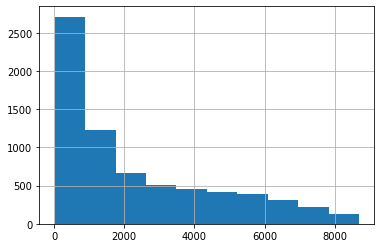

In [61]:
df_with_dummies["TotalCharges"].hist()

In [62]:
df_with_dummies[df_with_dummies["TotalCharges"].isna()]["TotalCharges"]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

lets replace na with mean values

In [63]:
df_with_dummies["TotalCharges"].mean()

2283.3004408418697

In [64]:
df_with_dummies.loc[df_with_dummies["TotalCharges"].isna(),"TotalCharges"]=df_with_dummies["TotalCharges"].mean()

In [65]:
df_with_dummies.isna().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                                0
Churn                                       0
InternetService__DSL                        0
InternetService__Fiber optic                0
InternetService__No                         0
Contract__Month-to-month                    0
Contract__One year                

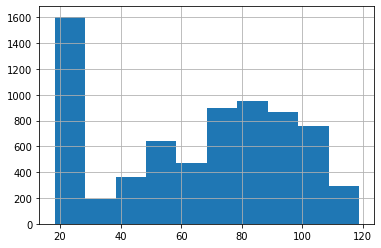

In [66]:
df_with_dummies["MonthlyCharges"].hist()

In [67]:
df2=df_with_dummies.copy()

In [68]:
df2.dtypes

gender                                        int64
SeniorCitizen                                 int64
Partner                                       int64
Dependents                                    int64
tenure                                        int64
PhoneService                                  int64
MultipleLines                                 int64
OnlineSecurity                                int64
OnlineBackup                                  int64
DeviceProtection                              int64
TechSupport                                   int64
StreamingTV                                   int64
StreamingMovies                               int64
PaperlessBilling                              int64
MonthlyCharges                              float64
TotalCharges                                float64
Churn                                        object
InternetService__DSL                          uint8
InternetService__Fiber optic                  uint8
InternetServ

In [70]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [71]:
df2["Churn"] = df2["Churn"].replace({"Yes":1,"No":0})

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report

In [76]:
y=df2["Churn"]
X=df2.drop("Churn",axis=1)

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [83]:
log_clf = LogisticRegression()
log_model = log_clf.fit(X_train,y_train)
log_pred =  log_model.predict(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1056
           1       0.67      0.55      0.60       353

    accuracy                           0.82      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



In [85]:
print("Accuracy of logistic model: ",accuracy_score(y_test,log_pred))
print("f1 score for logistic model is: ",f1_score(y_test, log_pred))
print("recall score for logistic model is: ",recall_score(y_test, log_pred))

Accuracy of logistic model:  0.8183108587650816
f1 score for logistic model is:  0.6012461059190032
recall score for logistic model is:  0.546742209631728


In [88]:
tree_clf = DecisionTreeClassifier()
tree_model = tree_clf.fit(X_train,y_train)
tree_pred = tree_model.predict(X_test)

In [89]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1056
           1       0.52      0.56      0.53       353

    accuracy                           0.76      1409
   macro avg       0.68      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409



In [90]:
print("Accuracy  of tree model: ",accuracy_score(y_test,tree_pred))
print("f1 score for tree model is: ",f1_score(y_test, tree_pred))
print("recall score for tree model is: ",recall_score(y_test, tree_pred))

Accuracy  of tree model:  0.7579843860894251
f1 score for tree model is:  0.5347885402455662
recall score for tree model is:  0.5552407932011332


In [93]:
forest_clf   = RandomForestClassifier(n_estimators=500)
forest_model = forest_clf.fit(X_train,y_train)
forest_pred  = forest_model.predict(X_test)

In [94]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1056
           1       0.64      0.55      0.59       353

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [99]:
print("Accuracy  of forest model: ",accuracy_score(y_test,forest_pred))
print("f1 score for forest model is: ",f1_score(y_test, forest_pred))
print("recall score for forest model is: ",recall_score(y_test, forest_pred))

Accuracy  of forest model:  0.8090844570617459
f1 score for forest model is:  0.5918057663125948
recall score for forest model is:  0.5524079320113314


In [95]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear')

logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8015619453319134


In [97]:
logreg2=LogisticRegression(C=0.1,penalty="l2",solver='liblinear')
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.8190205819730305


Lets try Gradient boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)

print("accuracy is: ",accuracy_score(y_test, gbm_pred))

# f1 score
print("f1 score is: ",f1_score(y_test, gbm_pred))

print("recall score is: ",recall_score(y_test, gbm_pred))

accuracy is:  0.8090844570617459
f1 score is:  0.5880551301684533
recall score is:  0.5439093484419264


# Logistic regression has outperform here

In [100]:
from sklearn.metrics import roc_curve

In [104]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

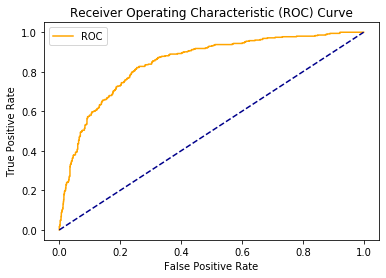

In [106]:
probs = log_model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

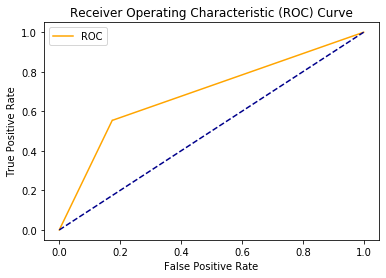

In [109]:
probs = tree_model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

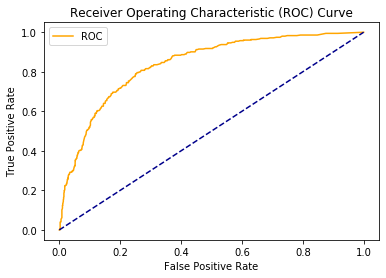

In [110]:
probs = forest_model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

In [112]:
import seaborn as sns

In [113]:
df2.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService__DSL,InternetService__Fiber optic,InternetService__No,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.017021,-0.013773,-0.002105,...,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,...,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,-0.199920,0.366083,-0.210564,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618,-0.227206
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,0.321269,-0.030696,-0.333403,-0.246679,0.100162,0.191773,0.095158,0.115721,-0.112338,-0.080798
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,0.157884,0.165651,-0.381593,-0.164172,0.083722,0.111400,0.087004,0.090785,-0.000408,-0.174164
DeviceProtection,-0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,0.146291,0.176049,-0.380754,-0.225662,0.102495,0.165096,0.083115,0.111554,-0.003351,-0.187373


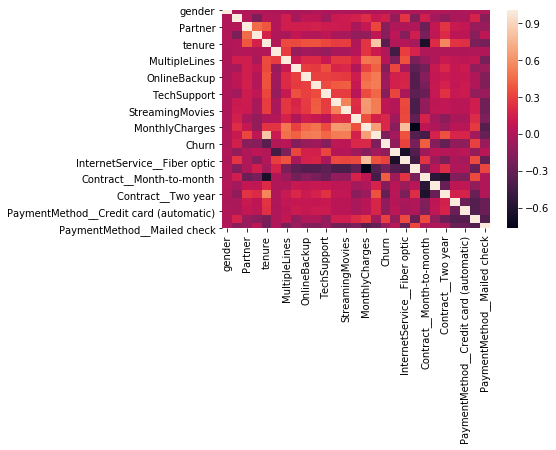

In [114]:
sns.heatmap(df2.corr())

In [116]:
forest_model.feature_importances_

array([0.0278226 , 0.02047238, 0.02258047, 0.01950419, 0.1555147 ,
       0.00653069, 0.01992677, 0.02117347, 0.02115315, 0.01873449,
       0.0197943 , 0.01738277, 0.01768199, 0.02601789, 0.17261957,
       0.18418467, 0.00988268, 0.04357761, 0.01180578, 0.06186443,
       0.01026261, 0.02615664, 0.01224279, 0.0119372 , 0.02933726,
       0.01183891])